# Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [ ]:
# Generate data
X, y = make_blobs(n_samples=500, centers=5)
print X.shape, y.shape

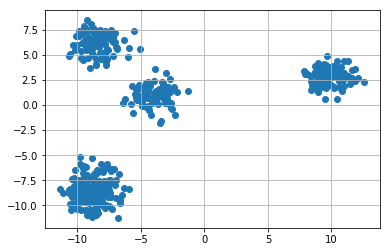

In [7]:
plt.figure(0)
plt.grid("on")
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [8]:
print X.shape

(500, 2)


In [9]:
# Create initial clusters
k = 5

colors = ['green', 'blue', 'red', 'yellow', 'orange', 'pink']

clusters = {}

for kx in range(k):
    center = 10.0*(2*np.random.random((X.shape[1],)) - 1)
    points = []
    cluster = {
        'center': center,
        'points': points,
        'color': colors[kx]
    }
    clusters[kx] = cluster

print clusters

{0: {'color': 'green', 'points': [], 'center': array([-6.66368802,  3.03087938])}, 1: {'color': 'blue', 'points': [], 'center': array([-9.18672889,  9.47402382])}, 2: {'color': 'red', 'points': [], 'center': array([-5.3557367 ,  0.74786113])}, 3: {'color': 'yellow', 'points': [], 'center': array([-2.3603875, -5.5655059])}, 4: {'color': 'orange', 'points': [], 'center': array([-1.45897704, -5.15831371])}}


In [10]:
# print clusters

In [11]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

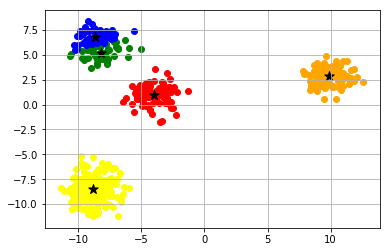

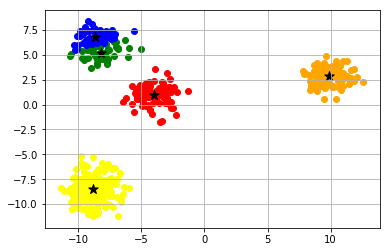

In [19]:
# For each point in dataset
for ix in range(X.shape[0]):
    dist = []
    curr_x = X[ix]
    
    for kx in range(k):
        d = distance(curr_x, clusters[kx]['center'])
        dist.append(d)
    # Get the respective cluster for this point
    current_cluster_id = np.argmin(dist)
    
    clusters[current_cluster_id]['points'].append(curr_x)
    
for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    # print pts.shape
    clusters[kx]['coords'] = pts

plt.figure(0)
plt.grid("on")
for kx in range(k):
    pts = clusters[kx]['coords']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['center']
    plt.scatter(center[0], center[1], color='black', s=100, marker='*')


for kx in range(k):
    if clusters[kx]['coords'].shape[0] > 0:
        new_center = clusters[kx]['coords'].mean(axis=0)
    else:
        new_center = clusters[kx]['center']
    clusters[kx]['center'] = new_center
    clusters[kx]['points'] = []
    

plt.figure(1)
plt.grid("on")
for kx in range(k):
    pts = clusters[kx]['coords']
    try:
        plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['center']
    plt.scatter(center[0], center[1], color='black', s=100, marker='*')
